TensorFlow Version: 1.2.1
Default GPU Device: /gpu:0
Extracting ../mnist_data/train-images-idx3-ubyte.gz
Extracting ../mnist_data/train-labels-idx1-ubyte.gz
Extracting ../mnist_data/t10k-images-idx3-ubyte.gz
Extracting ../mnist_data/t10k-labels-idx1-ubyte.gz


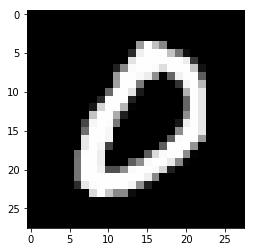

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os

# plotting pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# Helper to make the output consistent
SEED = 42
def reset_graph(seed=SEED):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# set log level to supress messages, unless an error
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# Check TensorFlow version
print('TensorFlow Version: {}'.format(tf.__version__))

# Check if using GPU
if not tf.test.gpu_device_name():
    print('No GPU found')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
    
reset_graph()

# import dataset (should already be present)
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('../mnist_data', validation_size=0)


# ------ Make sure we're up and running
# display, random, single image
img = mnist.train.images[np.random.randint(6000, size=1)]

# mnist is 28x28 = 784 and is grayscale
# meaning, the 784 vector needs to be reshaped to 28,28
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

In [3]:
he_init = tf.contrib.layers.variance_scaling_initializer() # He initialization
#Equivalent to:
#he_init = lambda shape, dtype=tf.float32: tf.truncated_normal(shape, 0., stddev=np.sqrt(2/shape[0]))

l2_regularizer = tf.contrib.layers.l2_regularizer(0.001)

In [13]:
reset_graph()

In [14]:
learning_rate = 0.001
img_vect_size = mnist.train.images.shape[1]

# input place holders
input_vector = tf.placeholder(tf.float32, (None, img_vect_size), name="input_vector")
input_target = tf.placeholder(tf.float32, (None, img_vect_size), name="input_label")

# --- Model
# encoder
enc_01 = tf.layers.dense(inputs=input_vector, units=512, 
                            kernel_initializer=he_init, 
                            kernel_regularizer=l2_regularizer,
                            activation=tf.nn.elu)

enc_02 = tf.layers.dense(inputs=enc_01, units=256, 
                            kernel_initializer=he_init, 
                            kernel_regularizer=l2_regularizer,
                            activation=tf.nn.elu)

enc_03 = tf.layers.dense(inputs=enc_02, units=128, 
                            kernel_initializer=he_init, 
                            kernel_regularizer=l2_regularizer,
                            activation=tf.nn.elu)

enc_04 = tf.layers.dense(inputs=enc_03, units=56, 
                            kernel_initializer=he_init, 
                            kernel_regularizer=l2_regularizer,
                            activation=tf.nn.elu)

encoder = tf.layers.dense(inputs=enc_04, units=28, 
                            kernel_initializer=he_init, 
                            kernel_regularizer=l2_regularizer,
                            activation=tf.nn.elu)

dec_01 = tf.layers.dense(inputs=encoder, units=56, 
                            kernel_initializer=he_init, 
                            kernel_regularizer=l2_regularizer,
                            activation=tf.nn.elu)

dec_02 = tf.layers.dense(inputs=dec_01, units=128, 
                            kernel_initializer=he_init, 
                            kernel_regularizer=l2_regularizer,
                            activation=tf.nn.elu)


dec_03 = tf.layers.dense(inputs=dec_02, units=256, 
                            kernel_initializer=he_init, 
                            kernel_regularizer=l2_regularizer,
                            activation=tf.nn.elu)

dec_04 = tf.layers.dense(inputs=dec_03, units=512, 
                            kernel_initializer=he_init, 
                            kernel_regularizer=l2_regularizer,
                            activation=tf.nn.elu)

logits = tf.layers.dense(dec_04, img_vect_size, activation=None)
decoded = tf.nn.sigmoid(logits, name="output")

# loss
xentropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=input_target, logits=logits)
batch_loss = tf.reduce_mean(xentropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate,
                                               beta1=0.9,
                                               beta2=0.999,
                                               epsilon=1e-08,
                                               use_locking=False,
                                               name='Adam')
training_op = optimizer.minimize(batch_loss)

# initializer and saver
with tf.name_scope("save_session"):
    init_global = tf.global_variables_initializer()
    init_local = tf.local_variables_initializer()
    saver = tf.train.Saver()

print("ready")

ready


In [15]:
epochs = 32
batch_size = 256
train_size = mnist.train.num_examples

with tf.Session() as sess:
    init_global.run()
    init_local.run()
    for e in range(epochs):
        for i in range(train_size//batch_size):
            batch_cur = mnist.train.next_batch(batch_size)
            feed_dict = {input_vector: batch_cur[0], input_target: batch_cur[0]}
            cost_batch, _ = sess.run([batch_loss, training_op], feed_dict=feed_dict)
            if i == 0:
                print("E: {}/{} - loss: {:.4f}".format(e+1, epochs, cost_batch))
    save_path = saver.save(sess, "./saver/multi_autoencoder")

E: 1/32 - loss: 0.9046
E: 2/32 - loss: 0.1338
E: 3/32 - loss: 0.1072
E: 4/32 - loss: 0.1051
E: 5/32 - loss: 0.0971
E: 6/32 - loss: 0.0933
E: 7/32 - loss: 0.0930
E: 8/32 - loss: 0.0927
E: 9/32 - loss: 0.0928
E: 10/32 - loss: 0.0867
E: 11/32 - loss: 0.0910
E: 12/32 - loss: 0.0916
E: 13/32 - loss: 0.0899
E: 14/32 - loss: 0.0833
E: 15/32 - loss: 0.0870
E: 16/32 - loss: 0.0863
E: 17/32 - loss: 0.0868
E: 18/32 - loss: 0.0849
E: 19/32 - loss: 0.0838
E: 20/32 - loss: 0.0843
E: 21/32 - loss: 0.0850
E: 22/32 - loss: 0.0803
E: 23/32 - loss: 0.0835
E: 24/32 - loss: 0.0842
E: 25/32 - loss: 0.0816
E: 26/32 - loss: 0.0827
E: 27/32 - loss: 0.0791
E: 28/32 - loss: 0.0820
E: 29/32 - loss: 0.0821
E: 30/32 - loss: 0.0817
E: 31/32 - loss: 0.0813
E: 32/32 - loss: 0.0792


INFO:tensorflow:Restoring parameters from ./saver/multi_autoencoder


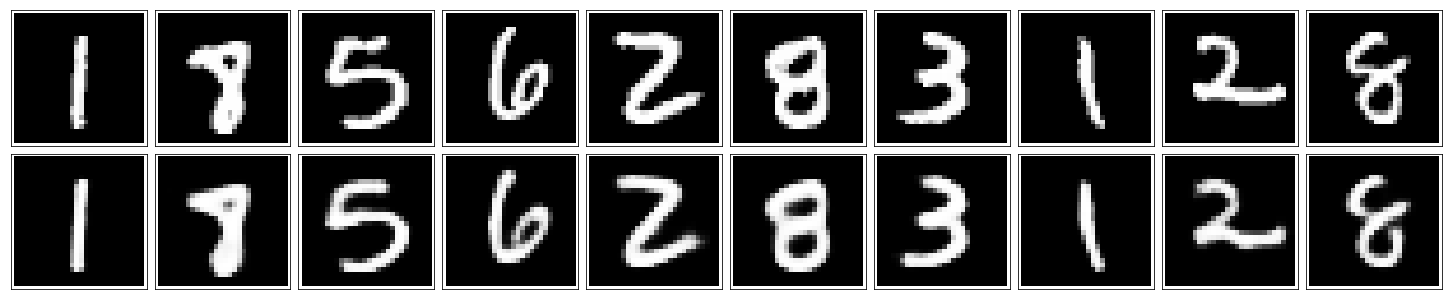

In [17]:
save_path = "./saver/multi_autoencoder"
sess = tf.Session()
saver.restore(sess, save_path)

start_index = int(np.random.randint(6000, size=1) - 10)
in_imgs = mnist.test.images[start_index:start_index+10]

# run model
reconstructed, compressed = sess.run([decoded, encoder], feed_dict={input_vector: in_imgs})

# plot
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
fig.tight_layout(pad=0.1)

In [18]:
sess.close()